In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from plotting_utils import *

In [4]:
train_log_dict = {
    'NerveNet (1-layer)': 'log/cent/mujoco_CentipedeSix(GNN-1-layer)-v12023_04_24-17:28:44.log',
    'NerveNet (2-layer)': 'log/cent/mujoco_CentipedeSix(GNN-2-layer)-v12023_04_24-18:11:10.log',
    'NerveNet (4-layer)': 'log/cent/mujoco_CentipedeSix(GNN-4-layer)-v12023_04_24-17:37:50.log',
    'NerveNet (8-layer)': 'log/cent/mujoco_CentipedeSix(GNN-8-layer)-v12023_04_24-17:13:35.log',
    'MLP': 'log/cent/mujoco_CentipedeSix(MLP)-v12023_04_25-01:31:08.log'
}

df_train = generate_train_df(train_log_dict)

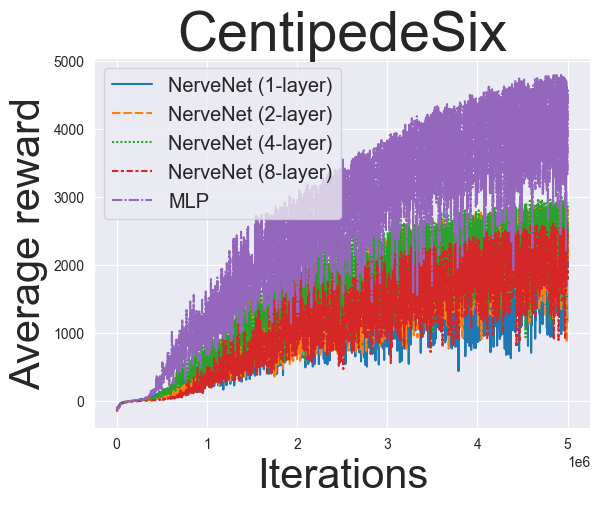

In [5]:
# UNCOMMENT LINE BELOW FOR PROPER PLOTTING, THIS IS TO KEEP FILESIZE LOW FOR GIT
#sns.set(rc={"figure.figsize":(15, 15)})
ax = sns.lineplot(data=df_train)
ax.set_xlabel('Iterations', fontsize=30)
ax.set_ylabel('Average reward', fontsize=30)
ax.set_title('CentipedeSix', fontsize='40')
ax.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('plots/cent6.png', bbox_inches='tight')
plt.show()

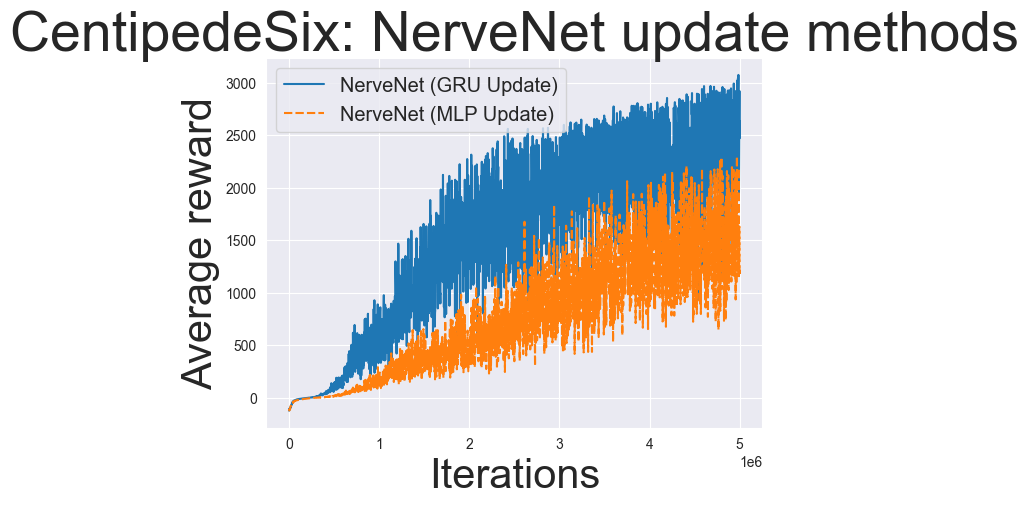

In [6]:
update_dict = {
    'NerveNet (GRU Update)': 'log/cent/mujoco_CentipedeSix(GNN-4-layer)-v12023_04_24-17:37:50.log',
    'NerveNet (MLP Update)': 'log/cent/mujoco_CentipedeSix(GNN-w-MLP-update)-v12023_04_24-00:10:21.log',
}

df_update = generate_train_df(update_dict)

ax = sns.lineplot(data=df_update)
ax.set_xlabel('Iterations', fontsize=30)
ax.set_ylabel('Average reward', fontsize=30)
ax.set_title('CentipedeSix: NerveNet update methods', fontsize='40')
ax.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('plots/cent6-updates.png', bbox_inches='tight')
plt.show()

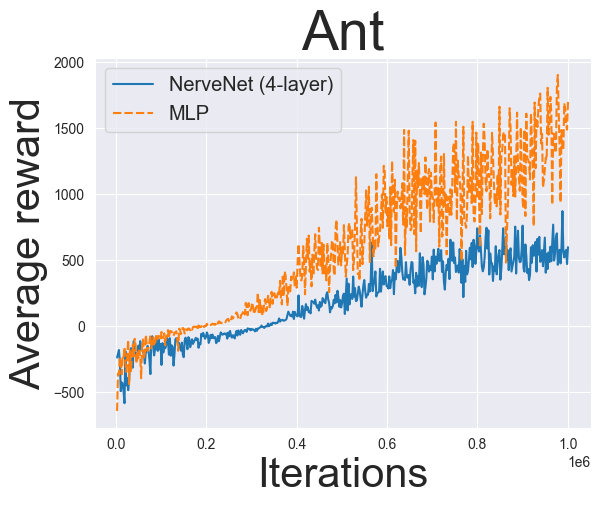

In [7]:
ant_dict = {
    'NerveNet (4-layer)': 'log/ant/mujoco_AntS-v1-GNN-2023_04_25-01:22:00.log',
    'MLP': 'log/ant/mujoco_AntS-v1-MLP-2023_04_25-00:39:12.log',
}

df_ant = generate_train_df(ant_dict)

ax = sns.lineplot(data=df_ant)
ax.set_xlabel('Iterations', fontsize=30)
ax.set_ylabel('Average reward', fontsize=30)
ax.set_title('Ant', fontsize='40')
ax.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('plots/ant.png', bbox_inches='tight')
plt.show()

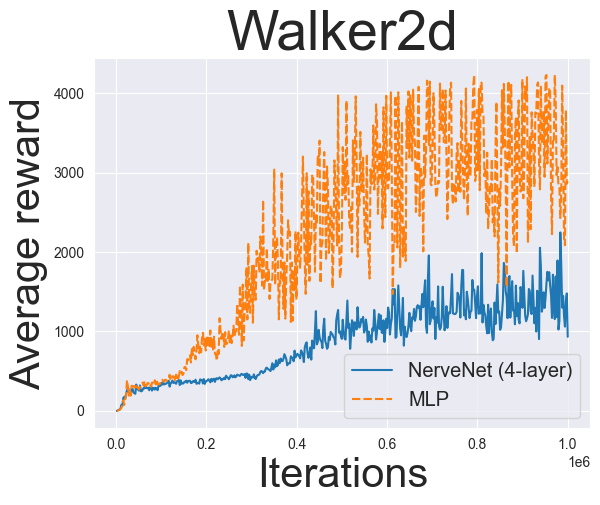

In [8]:
walker2d_dict = {
    'NerveNet (4-layer)': 'log/walker2d/mujoco_Walker2d-v12023_04_25-01:15:54.log',
    'MLP': 'log/walker2d/mujoco_Walker2d-v1-MLP-2023_04_24-23:47:54.log',
}

df_walker2d = generate_train_df(walker2d_dict)

ax = sns.lineplot(data=df_walker2d)
ax.set_xlabel('Iterations', fontsize=30)
ax.set_ylabel('Average reward', fontsize=30)
ax.set_title('Walker2d', fontsize='40')
ax.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('plots/walker2d.png', bbox_inches='tight')
plt.show()

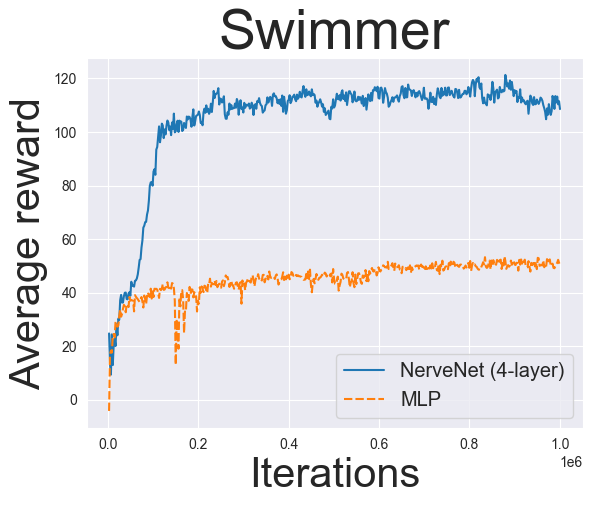

In [9]:
swimmer_dict = {
    'NerveNet (4-layer)': 'log/swimmer/mujoco_Swimmer-v12023_04_25-00:51:32.log',
    'MLP': 'log/swimmer/mujoco_Swimmer-v1-MLP-2023_04_24-23:13:25.log',
}

df_swimmer = generate_train_df(swimmer_dict)

ax = sns.lineplot(data=df_swimmer)
ax.set_xlabel('Iterations', fontsize=30)
ax.set_ylabel('Average reward', fontsize=30)
ax.set_title('Swimmer', fontsize='40')
ax.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('plots/swimmer.png', bbox_inches='tight')
plt.show()

In [10]:
df_transfer = generate_transfer_df('log/transfer')

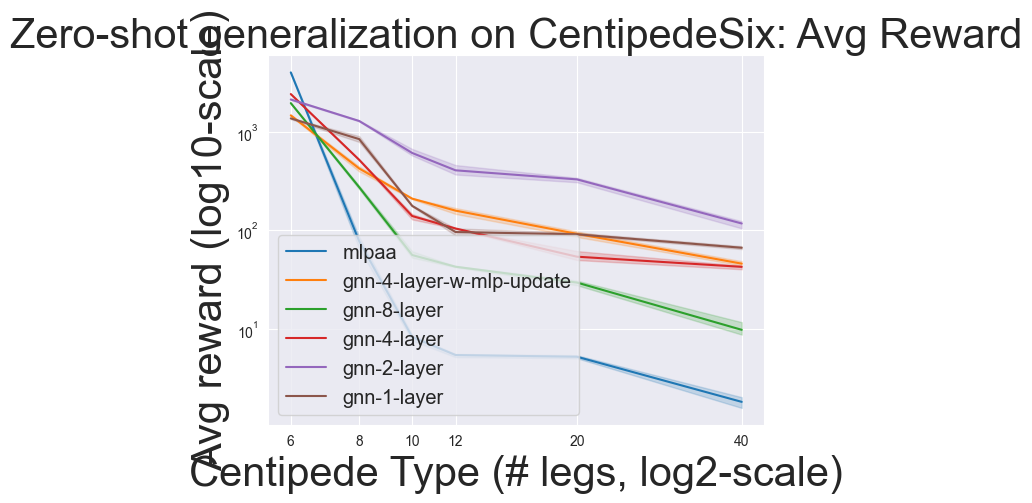

In [11]:
ax = sns.lineplot(data=df_transfer, x='Centipede Type', y='Avg Reward', hue='Model')
ax.set_xlabel('Centipede Type (# legs, log2-scale)', fontsize=30)
ax.set_ylabel('Avg reward (log10-scale)', fontsize=30)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_xticks([6, 8, 10, 12, 20, 40])
ax.set_xticklabels([6, 8, 10, 12, 20, 40])
ax.set_title('Zero-shot generalization on CentipedeSix: Avg Reward', fontsize='30')
ax.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('plots/transfer-cent6-avg.png', bbox_inches='tight')
plt.show()

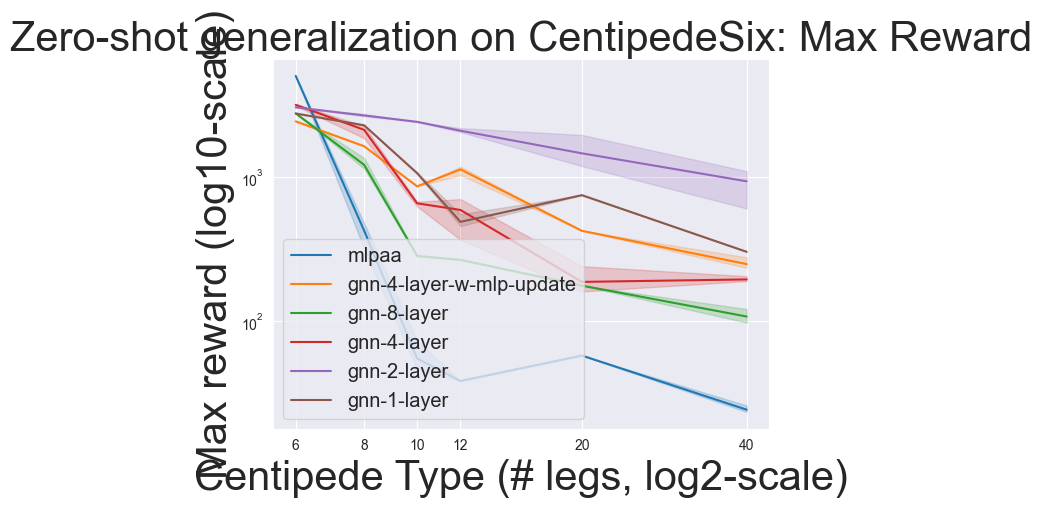

In [12]:
ax = sns.lineplot(data=df_transfer, x='Centipede Type', y='Max Reward', hue='Model')
ax.set_xlabel('Centipede Type (# legs, log2-scale)', fontsize=30)
ax.set_ylabel('Max reward (log10-scale)', fontsize=30)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.set_xticks([6, 8, 10, 12, 20, 40])
ax.set_xticklabels([6, 8, 10, 12, 20, 40])
ax.set_title('Zero-shot generalization on CentipedeSix: Max Reward', fontsize='30')
ax.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('plots/transfer-cent6-max.png', bbox_inches='tight')
plt.show()

In [13]:
df_gb = df_transfer.groupby(['Model', 'Centipede Type'], as_index=False).agg({'Avg Reward':['describe']})

In [14]:
df_gb

Model Centipede Type Avg Reward               \
                                              describe                
                                                 count         mean   
0                gnn-1-layer              6        3.0  1367.658609   
1                gnn-1-layer              8        3.0   843.443491   
2                gnn-1-layer             10        3.0   177.421784   
3                gnn-1-layer             12        3.0    96.425470   
4                gnn-1-layer             20        3.0    91.456570   
5                gnn-1-layer             40        3.0    66.784955   
6                gnn-2-layer              6        3.0  2125.743760   
7                gnn-2-layer              8        3.0  1287.191792   
8                gnn-2-layer             10        3.0   609.992897   
9                gnn-2-layer             12        3.0   407.002603   
10               gnn-2-layer             20        3.0   329.443397   
11               gnn-2-layer             40        3.0   117.703166   
12               gnn-4-layer              6        3.0  2413.164834   
13               gnn-4-layer              8        3.0   520.230033   
14               gnn-4-layer             10        3.0   140.022583   
15               gnn-4-layer             12        3.0   104.774031   
16               gnn-4-layer             20        3.0    54.226820   
17               gnn-4-layer             40        3.0    42.784521   
18  gnn-4-layer-w-mlp-update              6        3.0  1467.143771   
19  gnn-4-layer-w-mlp-update              8        3.0   424.999480   
20  gnn-4-layer-w-mlp-update             10        3.0   210.116136   
21  gnn-4-layer-w-mlp-update             12        3.0   158.892500   
22  gnn-4-layer-w-mlp-update             20        3.0    92.420933   
23  gnn-4-layer-w-mlp-update             40        3.0    46.109373   
24               gnn-8-layer              6        3.0  1952.685692   
25               gnn-8-layer              8        3.0   274.724566   
26               gnn-8-layer             10        3.0    56.345511   
27               gnn-8-layer             12        3.0    42.927297   
28               gnn-8-layer             20        3.0    29.644796   
29               gnn-8-layer             40        3.0     9.841671   
30                     mlpaa              6        3.0  3999.327230   
31                     mlpaa              8        3.0    77.931718   
32                     mlpaa             10        3.0     8.299722   
33                     mlpaa             12        3.0     5.464285   
34                     mlpaa             20        3.0     5.250464   
35                     mlpaa             40        3.0     1.831785   

                                                                                
                                                                                
          std          min          25%          50%          75%          max  
0   21.350590  1343.775934  1359.039305  1374.302675  1379.599946  1384.897218  
1   57.549182   788.996582   813.335105   837.673628   870.666945   903.660262  
2    2.618021   175.155124   175.988989   176.822853   178.555113   180.287374  
3    7.999396    89.044864    92.175359    95.305855   100.115774   104.925692  
4    3.110628    89.631396    89.660728    89.690059    92.369157    95.048255  
5    2.348996    64.719428    65.507327    66.295225    67.817718    69.340211  
6   34.809466  2096.856434  2106.419856  2115.983277  2140.187423  2164.391570  
7   15.751166  1275.725906  1278.211825  1280.697745  1292.924736  1305.151727  
8   52.144261   575.085369   580.022650   584.959931   627.446662   669.933393  
9   47.551933   368.957626   380.347692   391.737759   426.025091   460.312423  
10  19.050114   308.030966   321.908678   335.786389   340.149612   344.512835  
11  11.000992   105.001462   114.453796   123.906129   124.054018   124.201907  
12  26.532350  2382.616484  2404.51973